Current directory: C:\Dilan\Study\Master Thesis\Characterization\XRD\17-09-2025\XY Data


C:\Users\Dilan\AppData\Local\Temp\ipykernel_12576\1122111191.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,5))


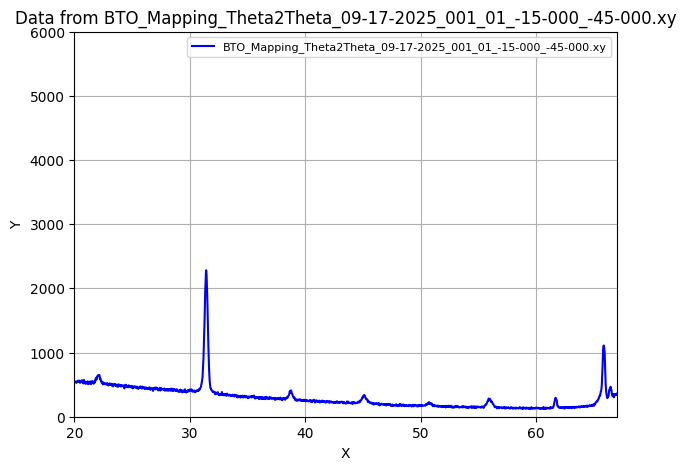

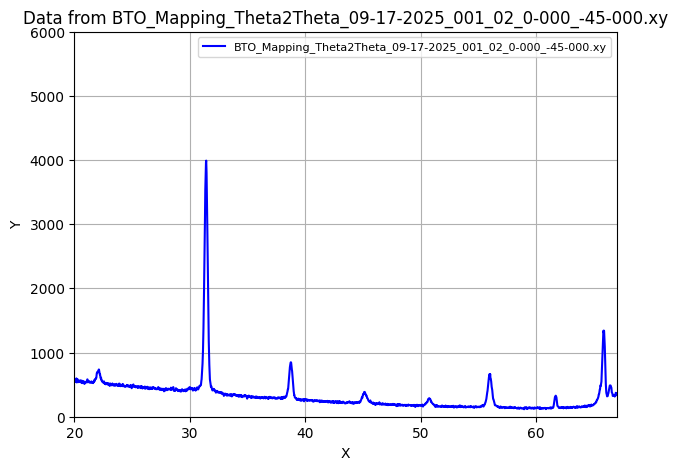

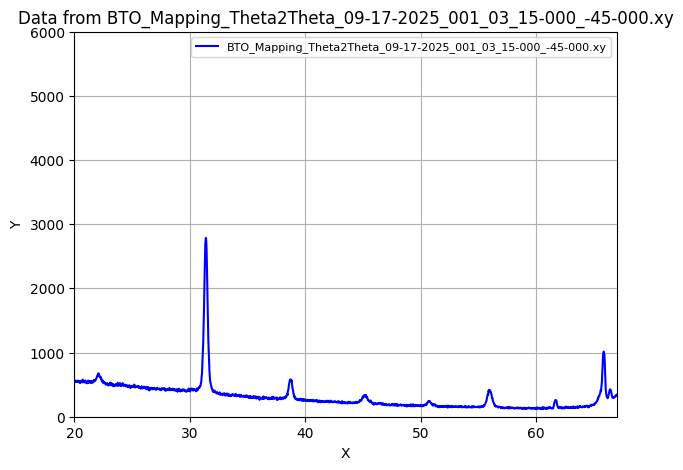

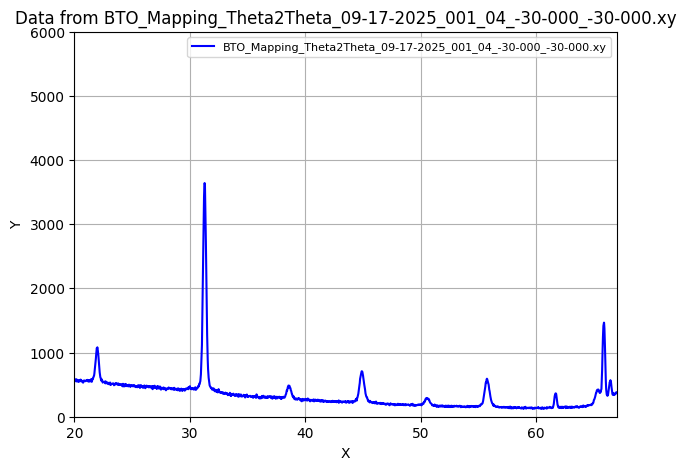

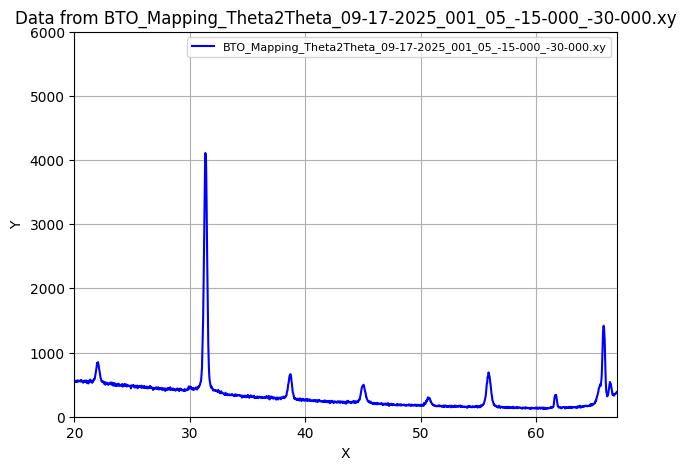

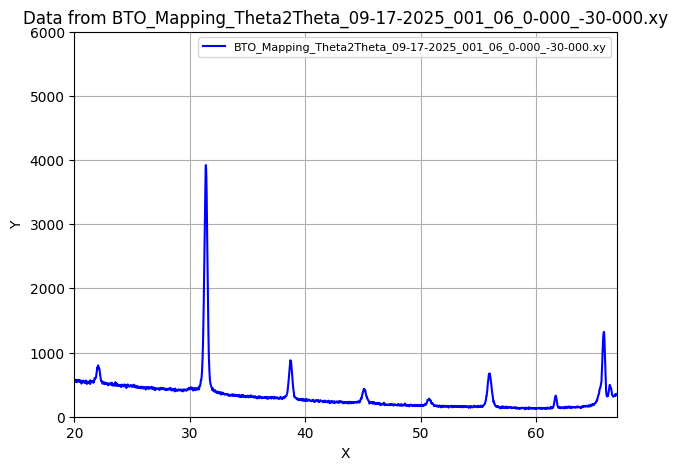

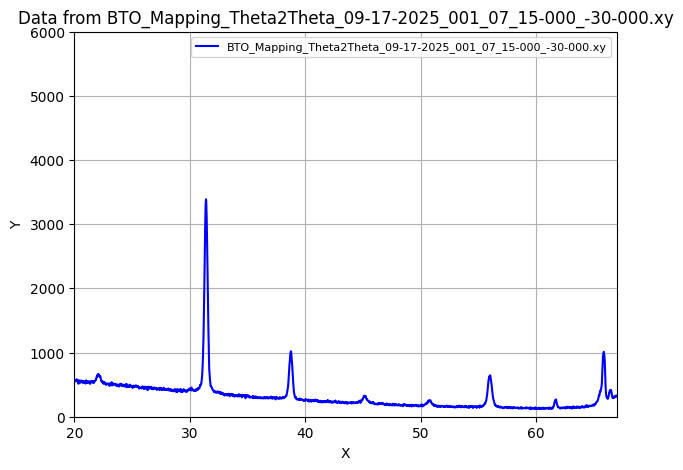

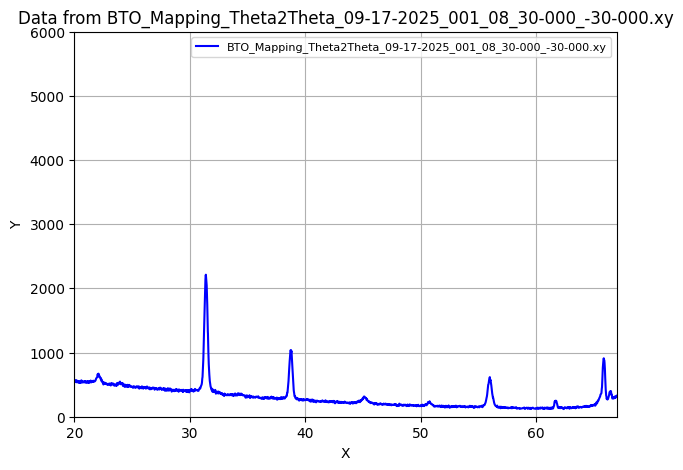

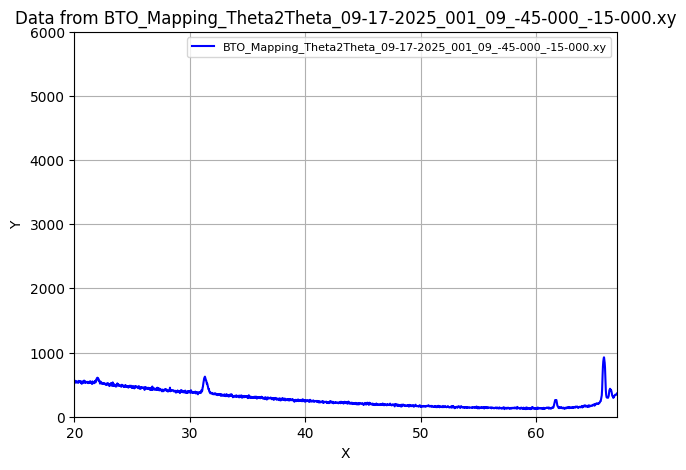

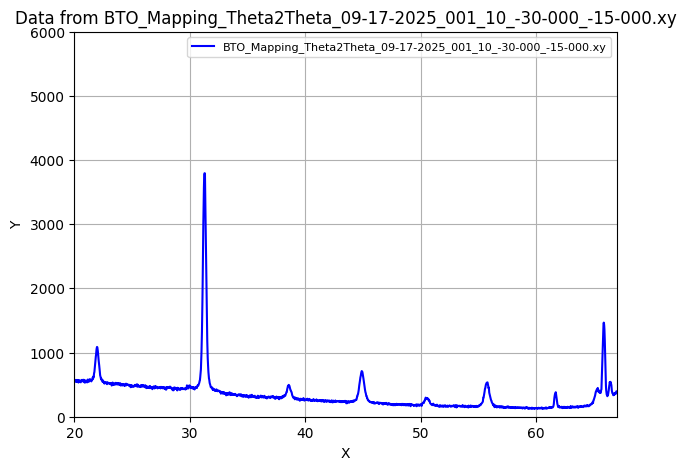

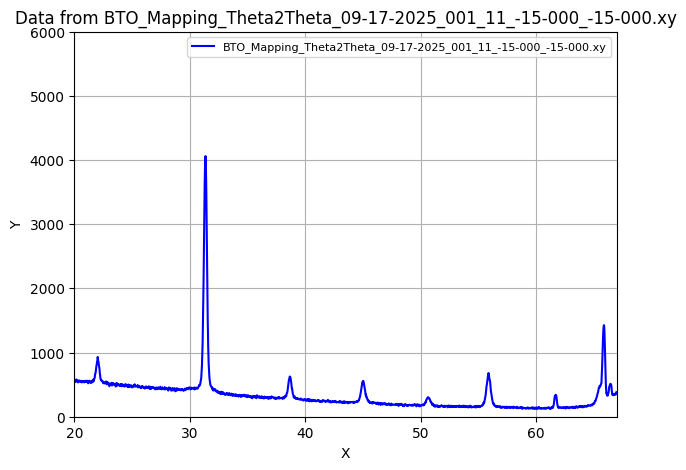

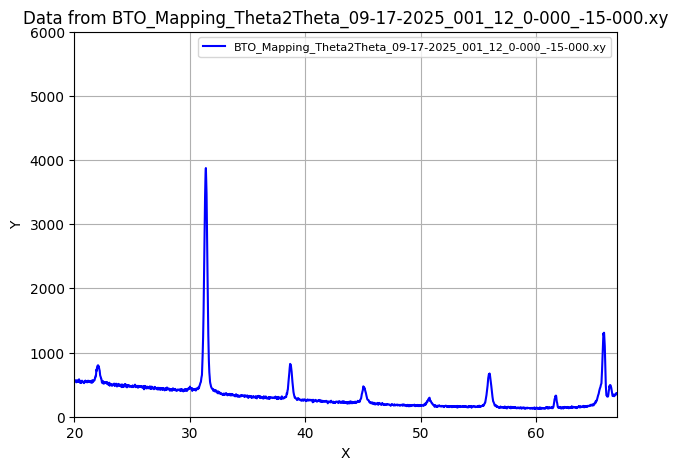

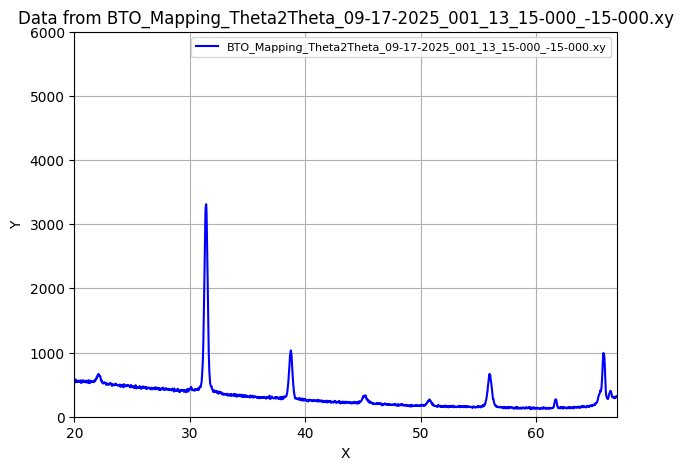

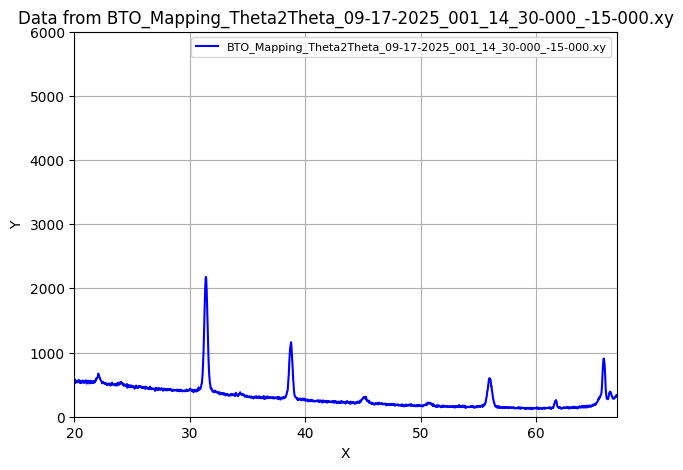

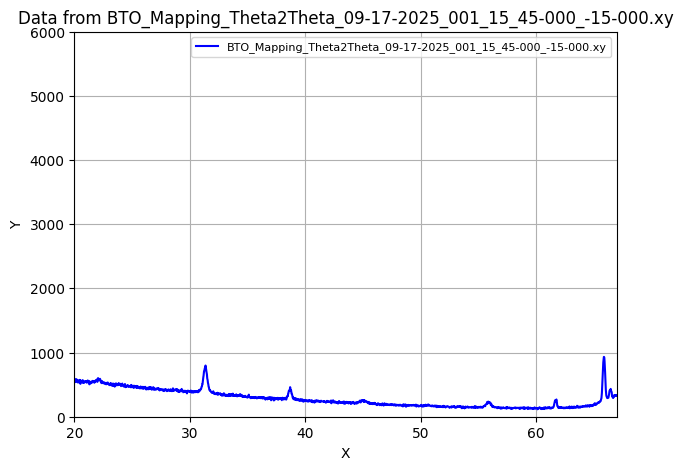

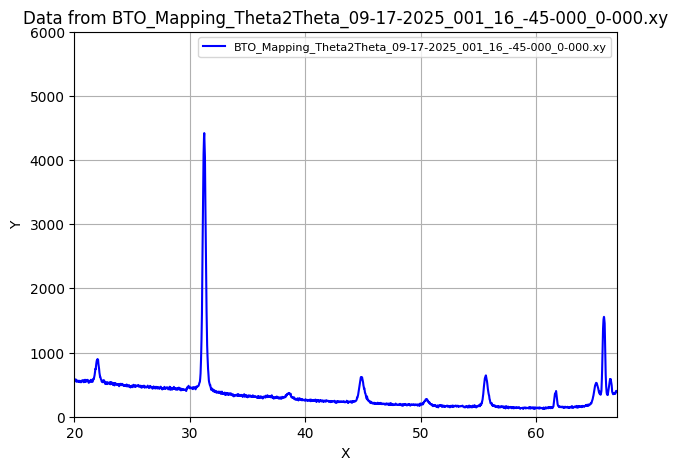

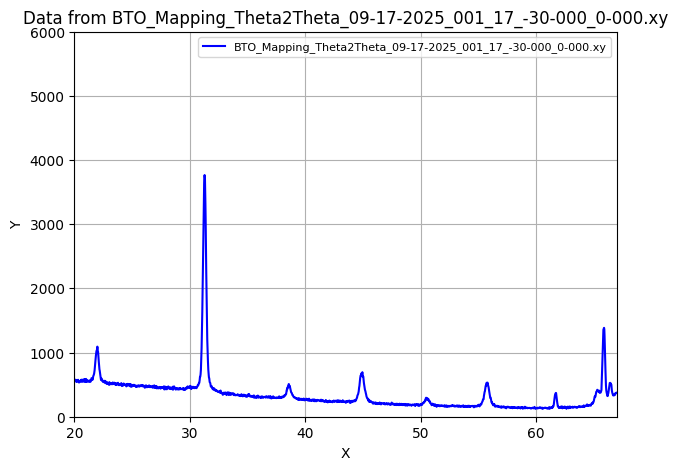

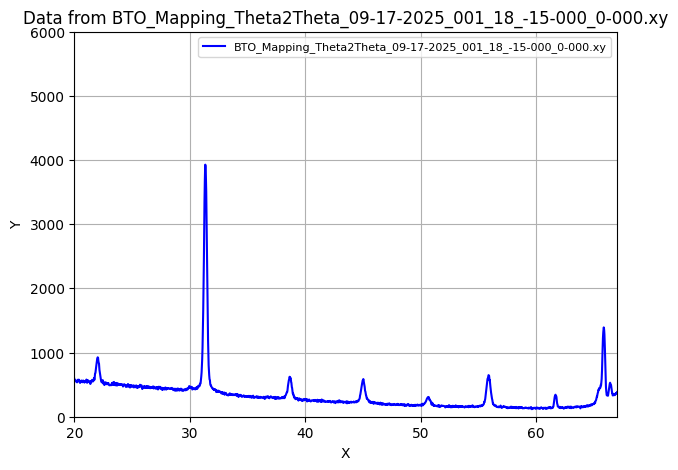

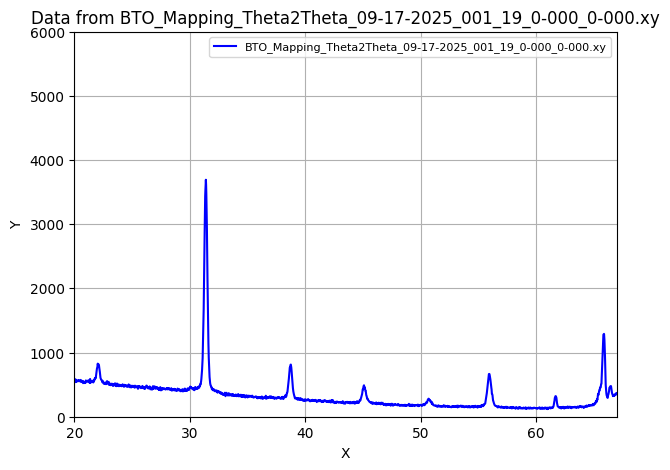

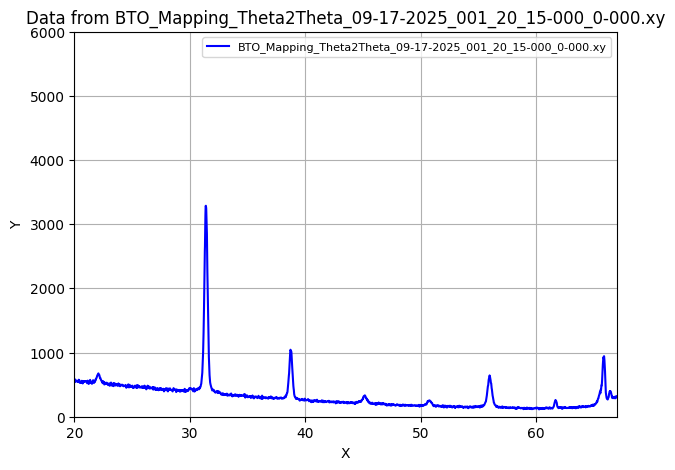

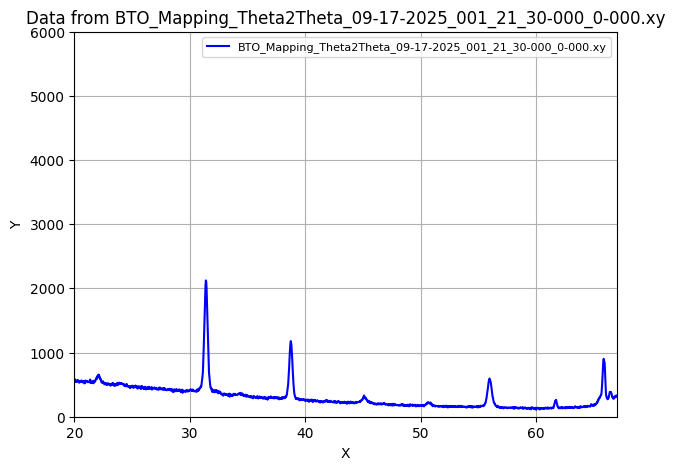

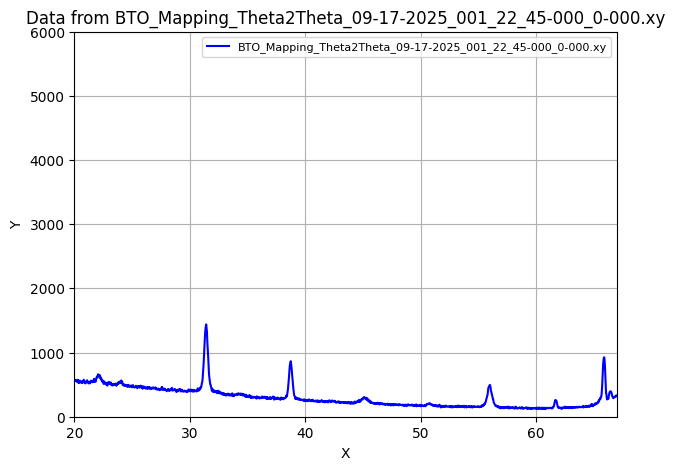

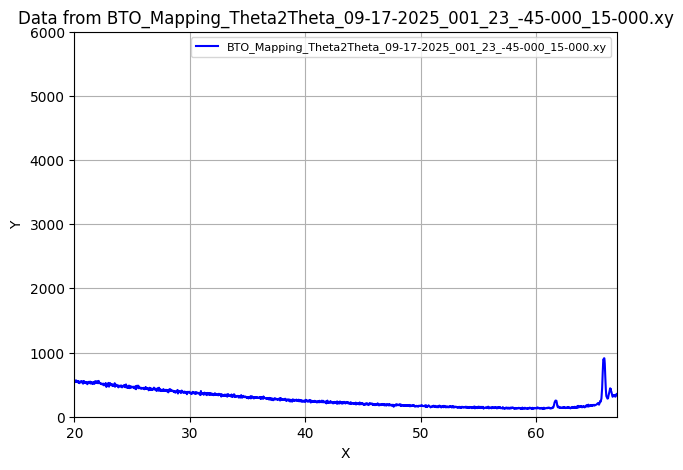

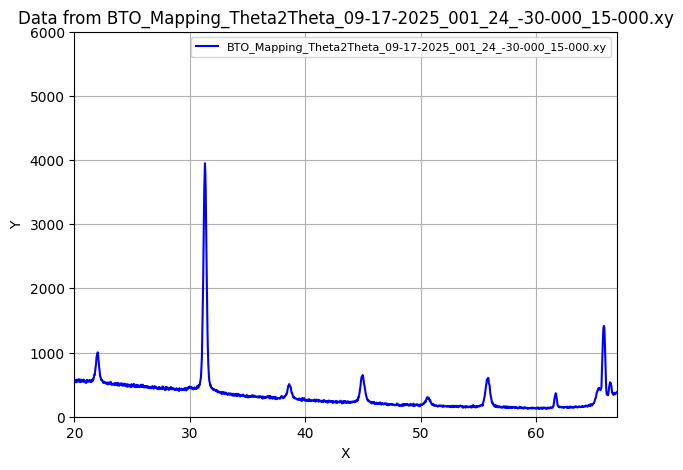

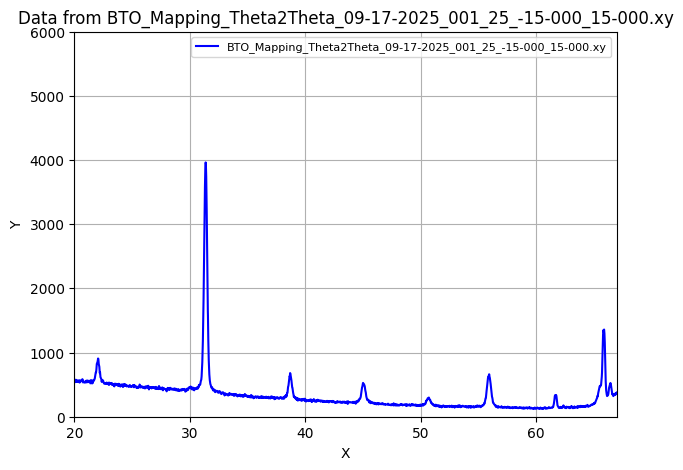

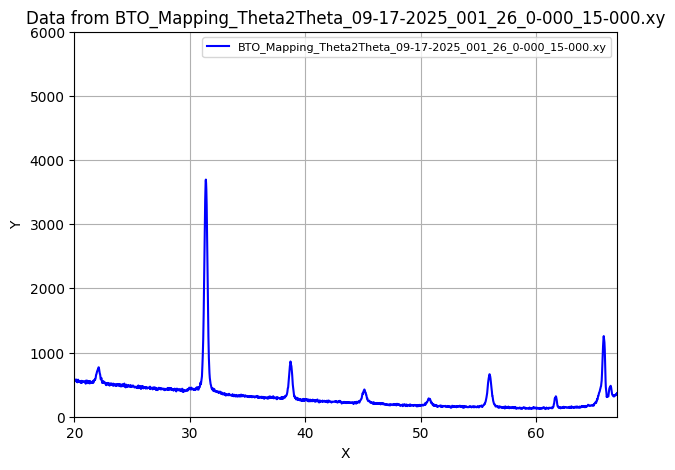

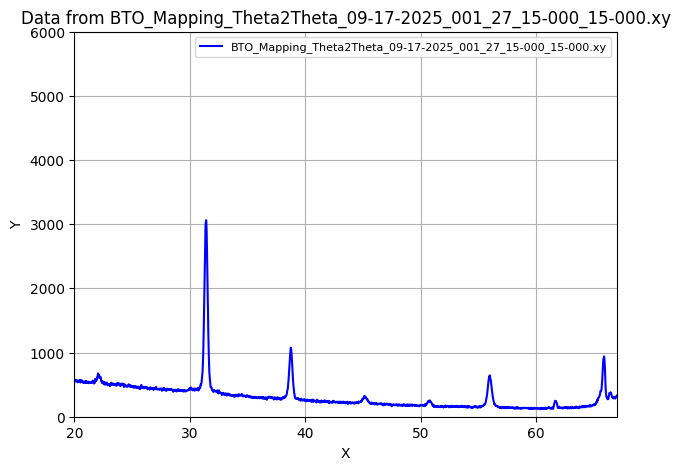

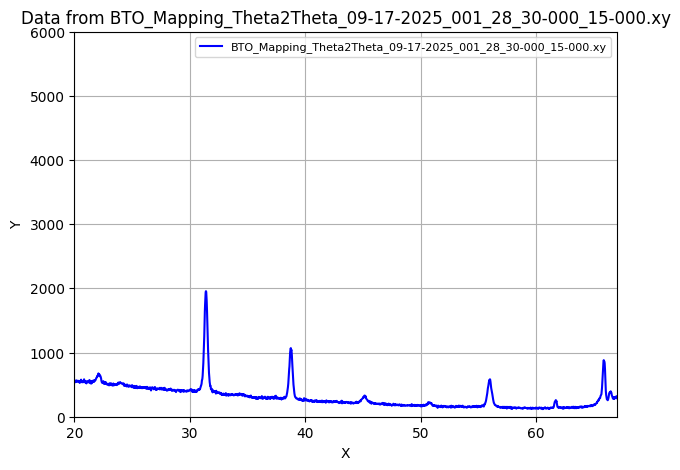

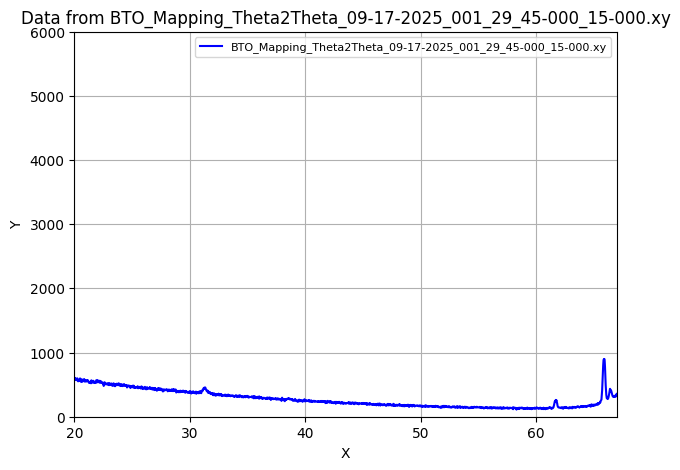

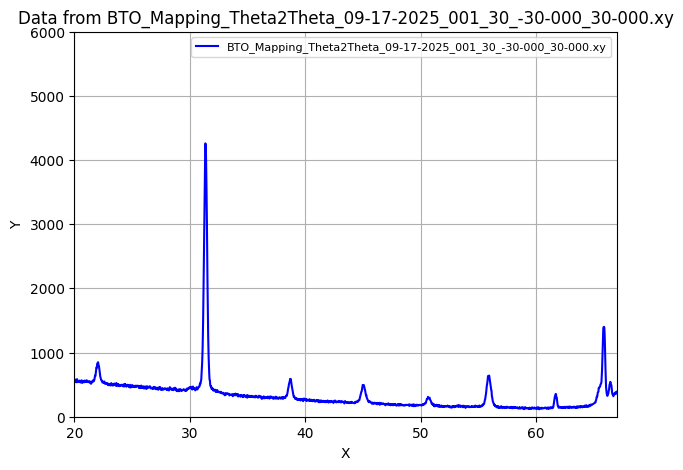

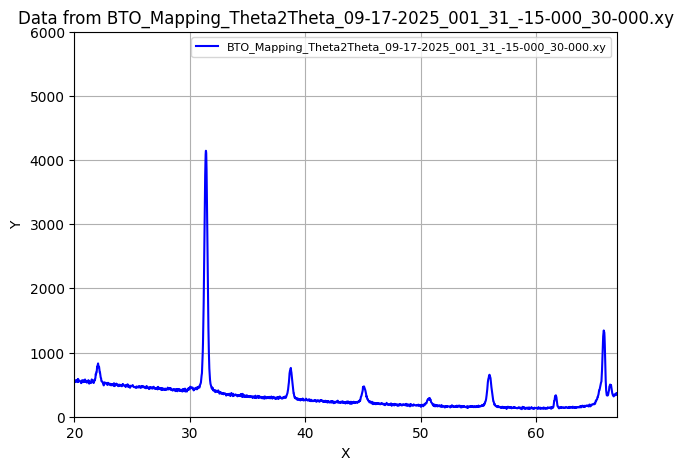

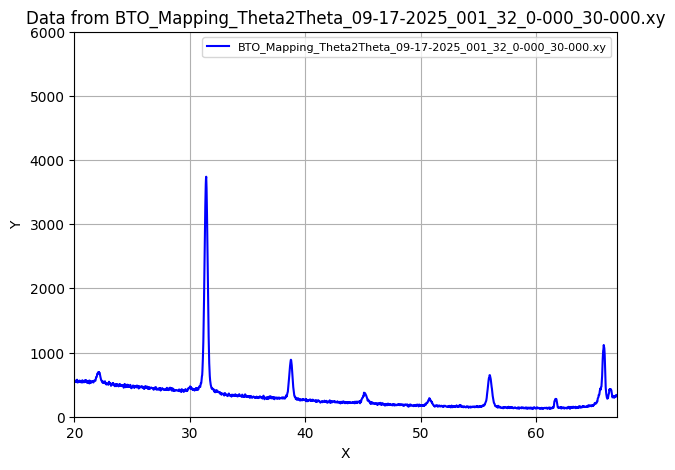

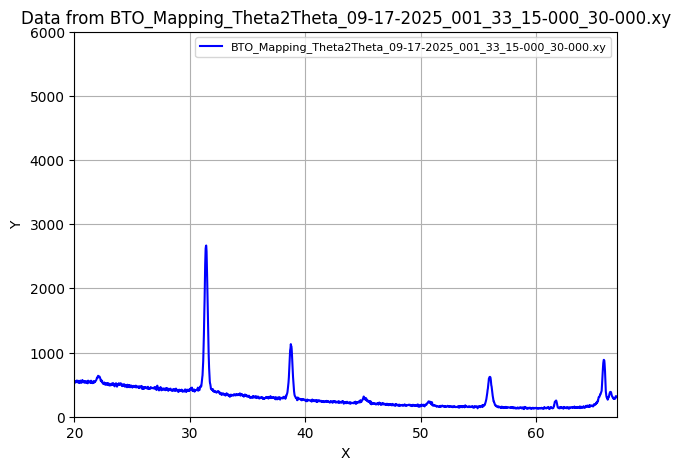

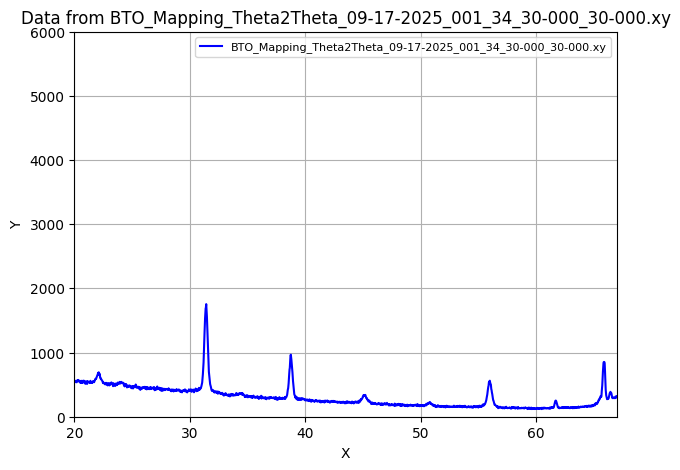

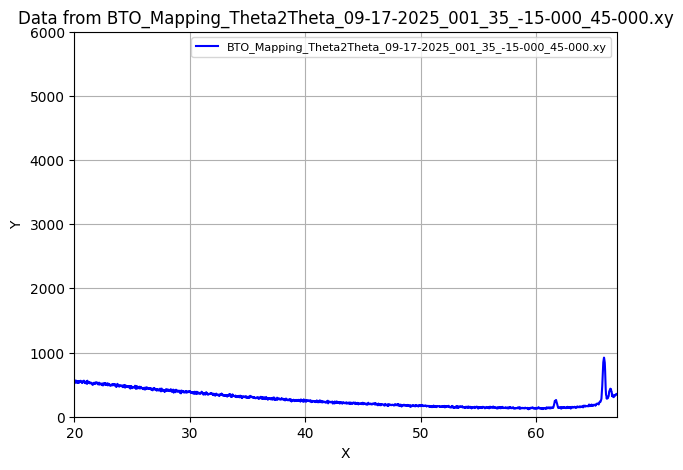

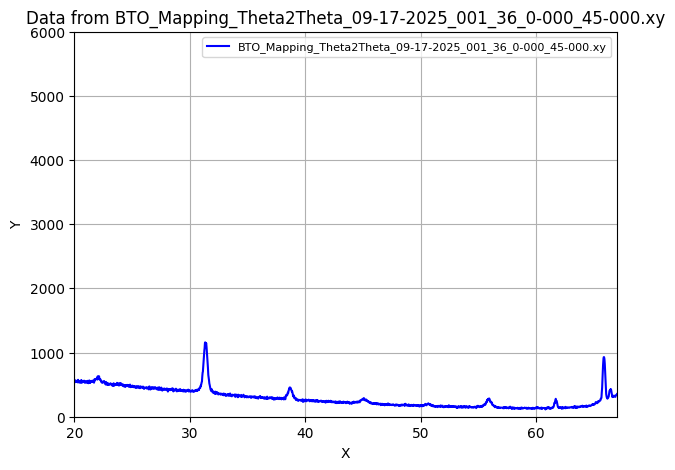

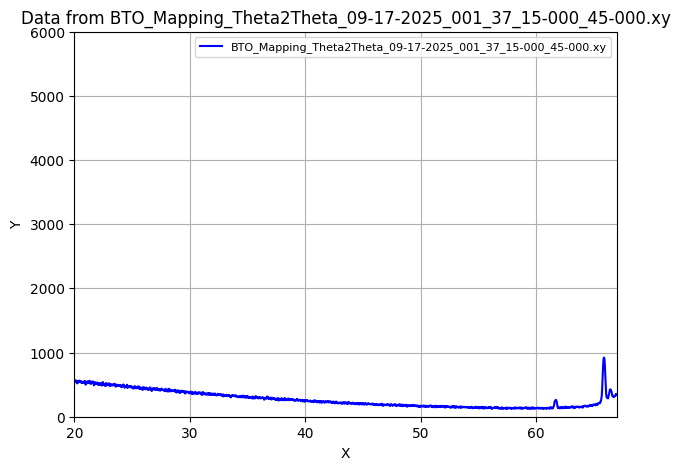

In [6]:
import pandas as pd
import numpy as np
import os, glob, re, csv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
from matplotlib.tri import Triangulation


# Show current working directory
print("Current directory:", os.getcwd())

# Change working directory
os.chdir("C:\\Dilan\\Study\\Master Thesis\\Characterization\\XRD\\17-09-2025")

folder = "C:\\Dilan\\Study\\Master Thesis\\Characterization\\XRD\\17-09-2025\\XY Data"
os.chdir(folder)

files = glob.glob("*.xy")



# Loop over each file and make a separate graph
for f in files:
    df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])
    
    plt.figure(figsize=(7,5))
    plt.plot(df["X"], df["Y"], label=f, color="blue")
    
    plt.title(f"Data from {f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(fontsize=8)
    plt.xlim(20,67)
    plt.ylim(0,6000)
    plt.grid()
    # plt.show()



C:\Users\Dilan\AppData\Local\Temp\ipykernel_12576\668740941.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,5))


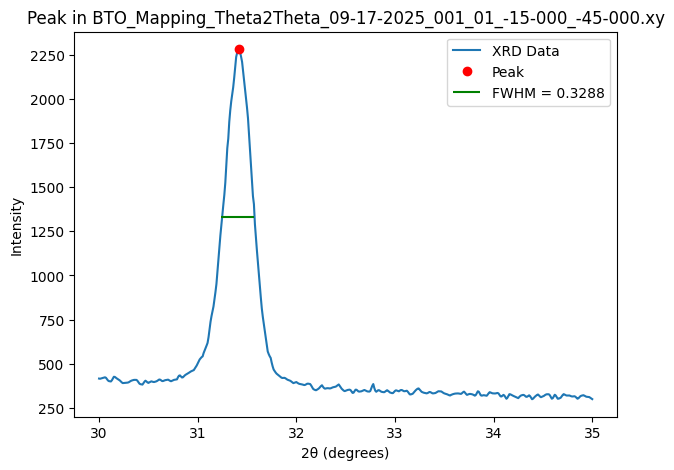

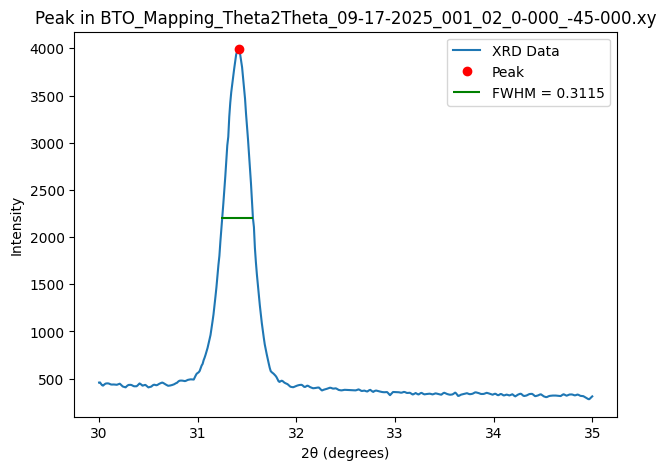

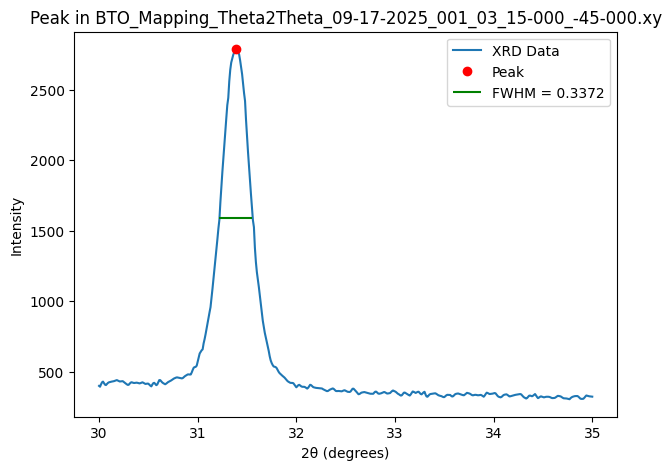

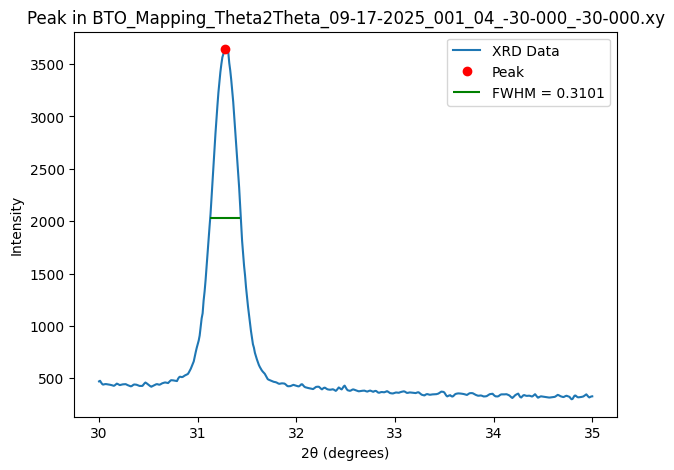

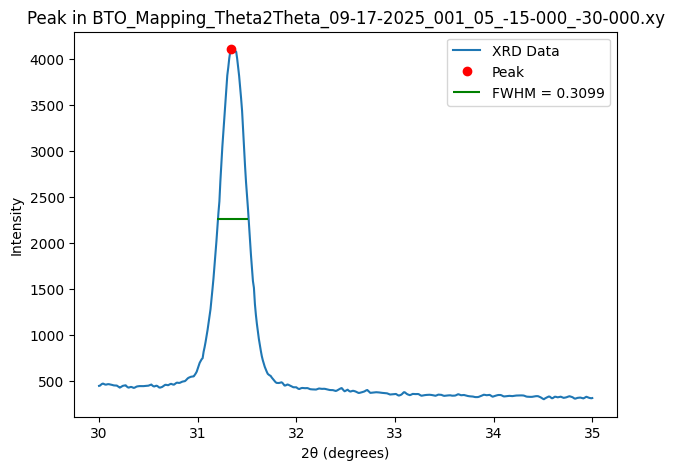

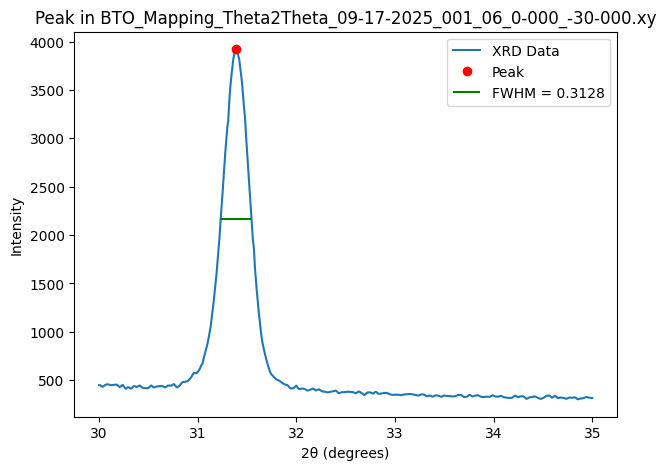

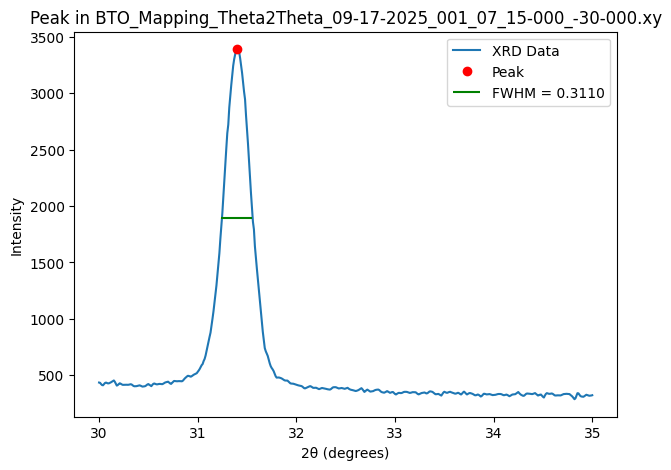

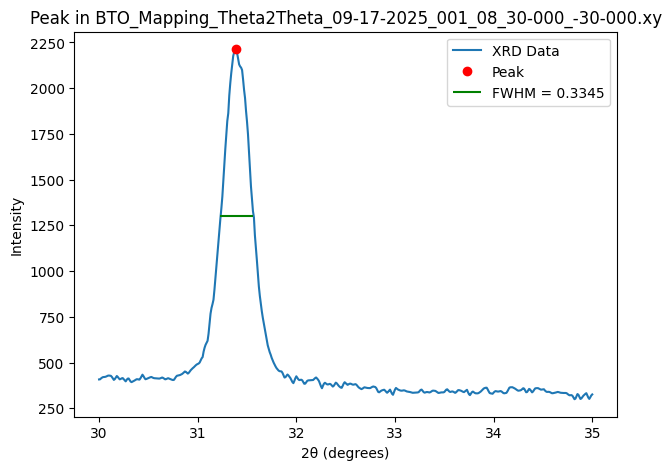

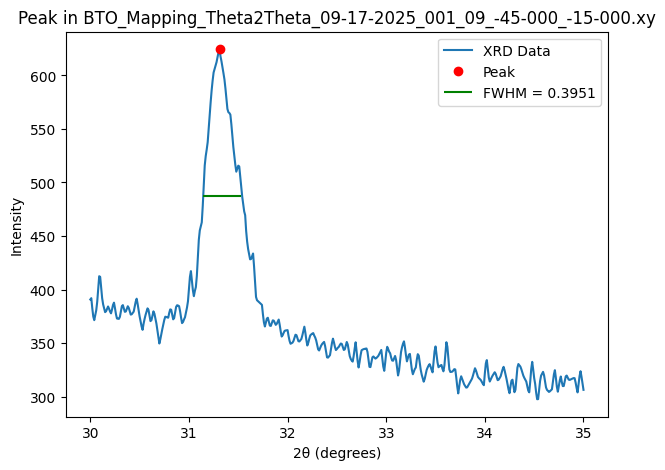

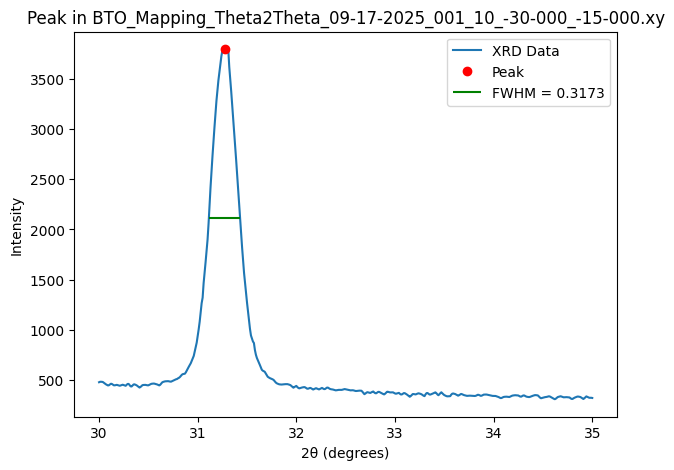

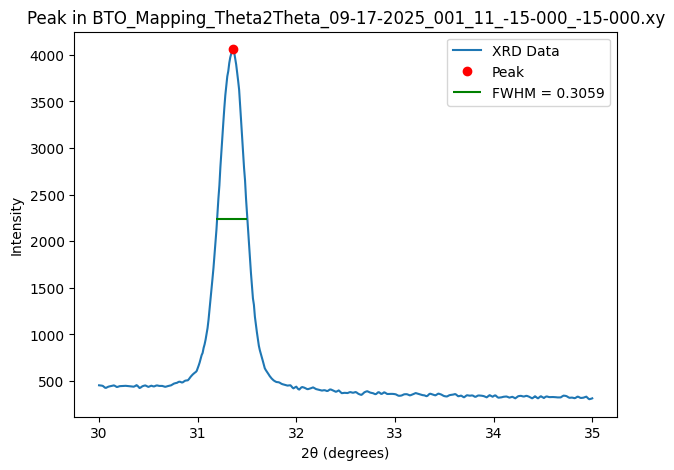

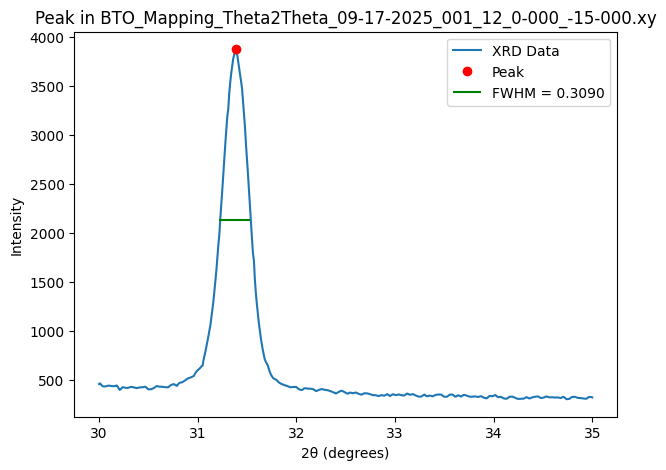

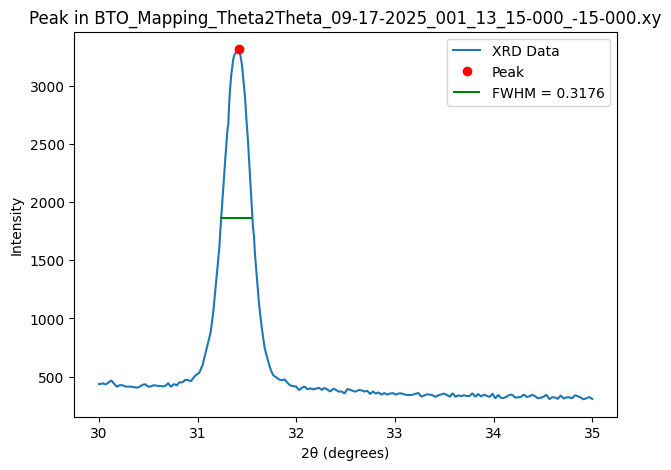

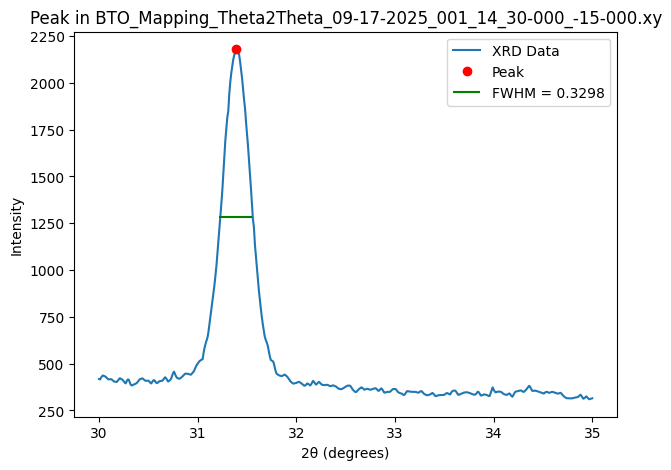

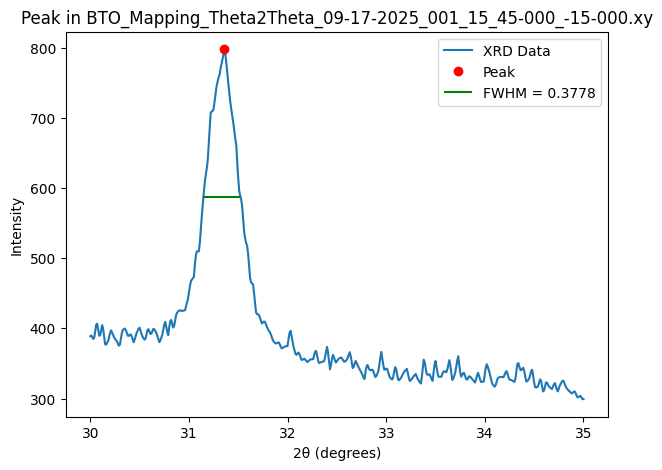

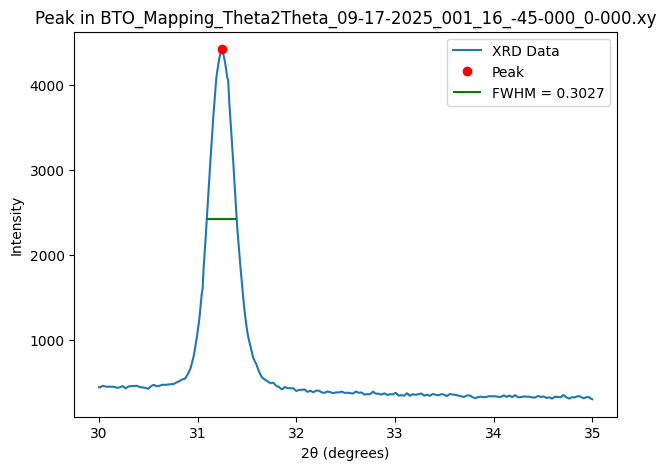

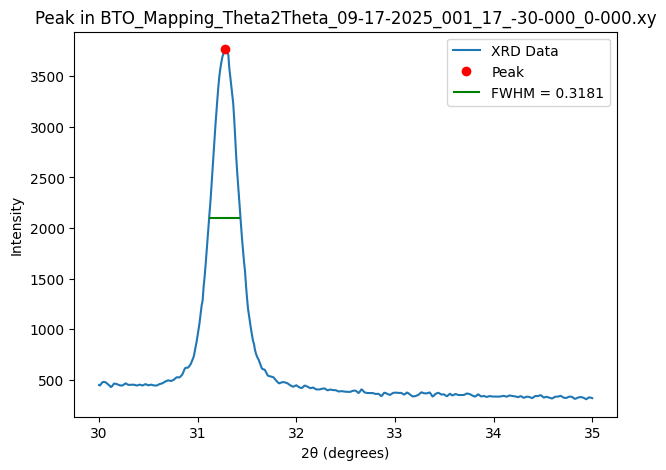

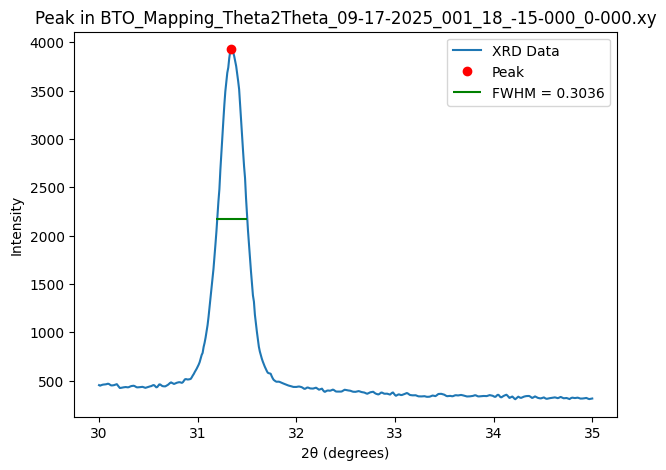

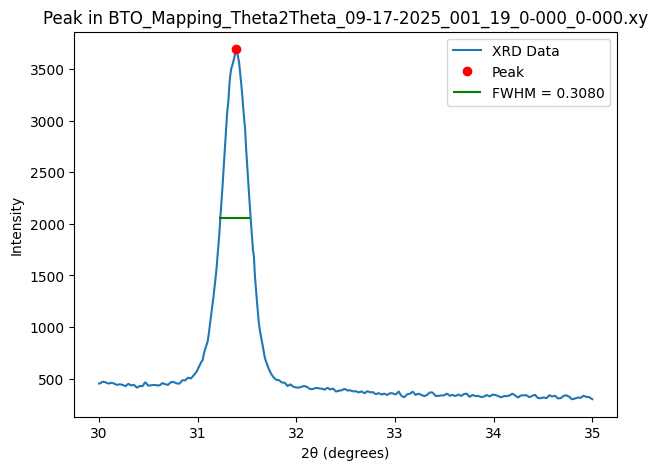

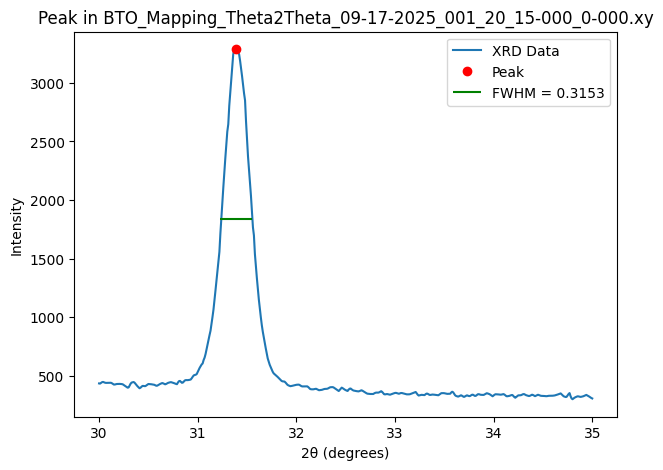

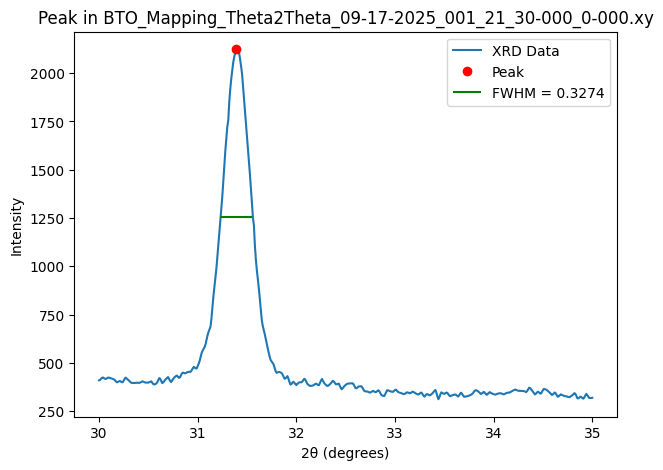

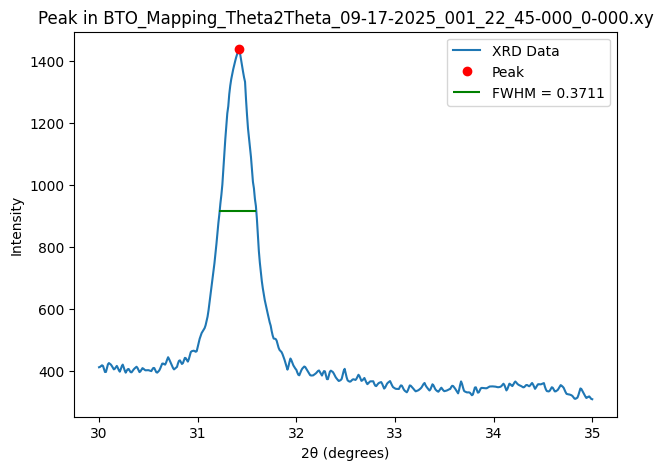

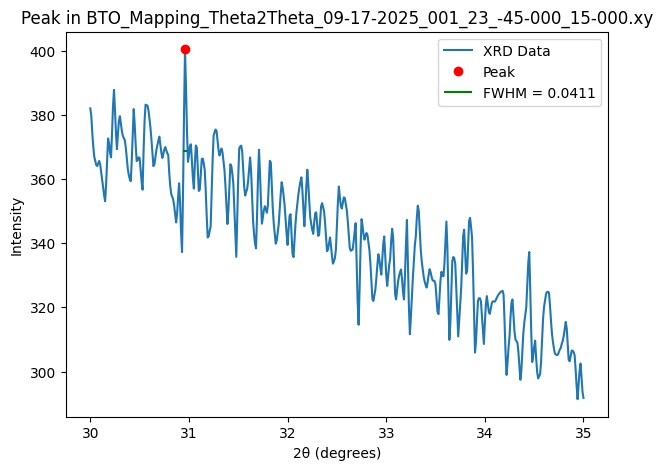

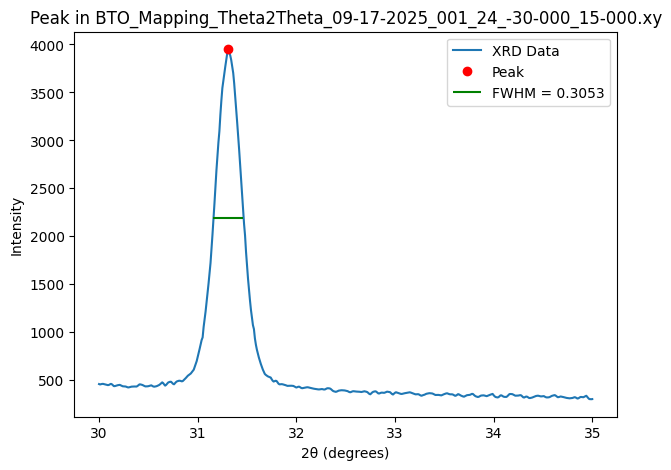

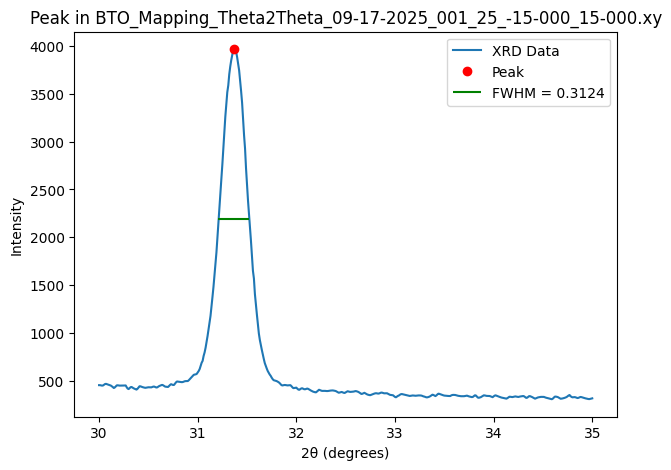

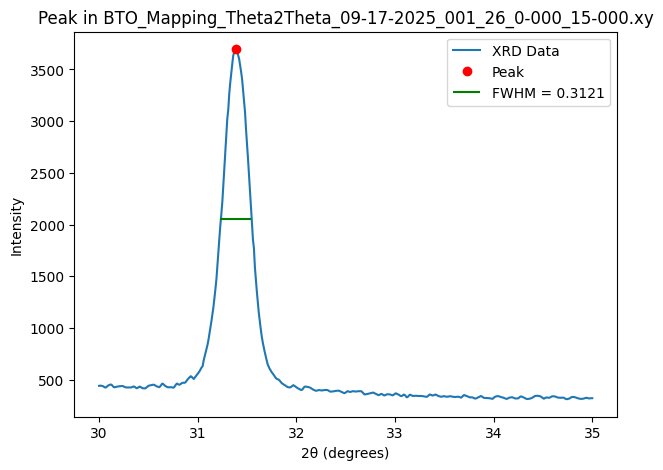

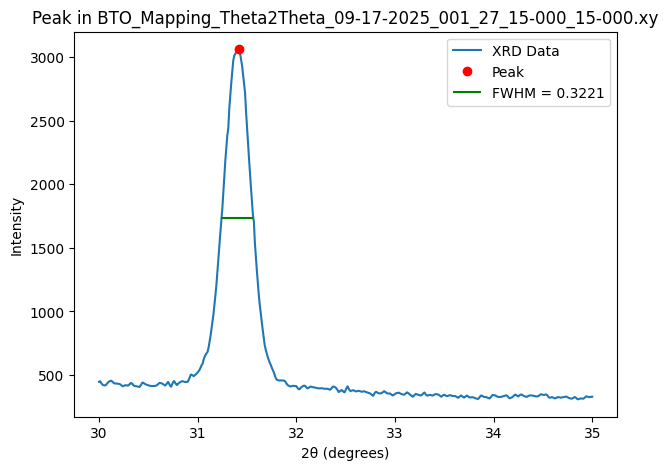

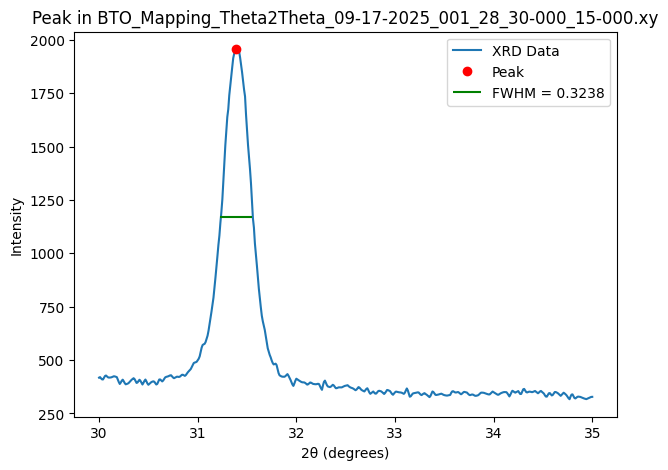

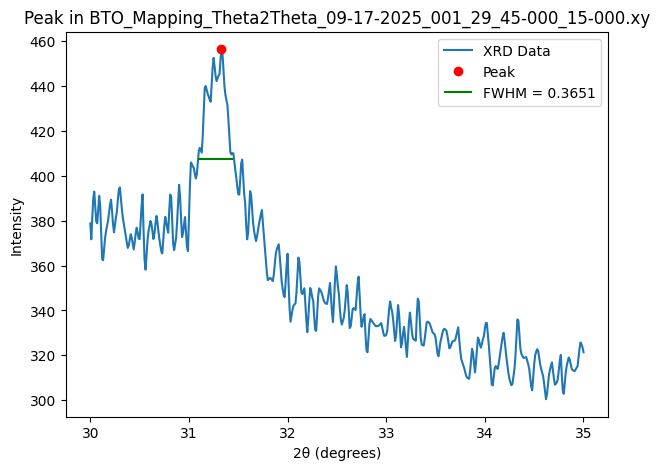

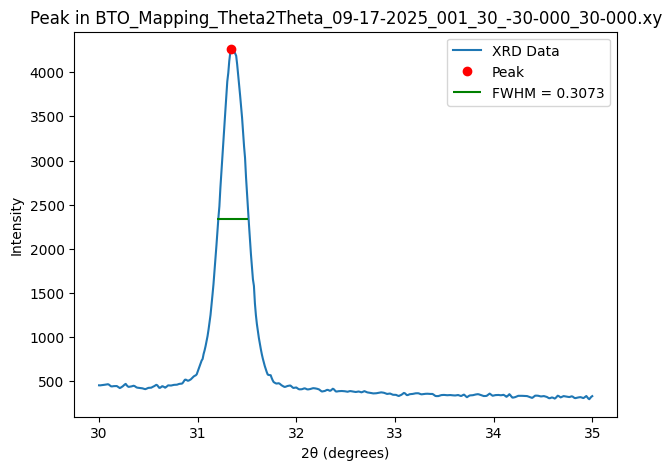

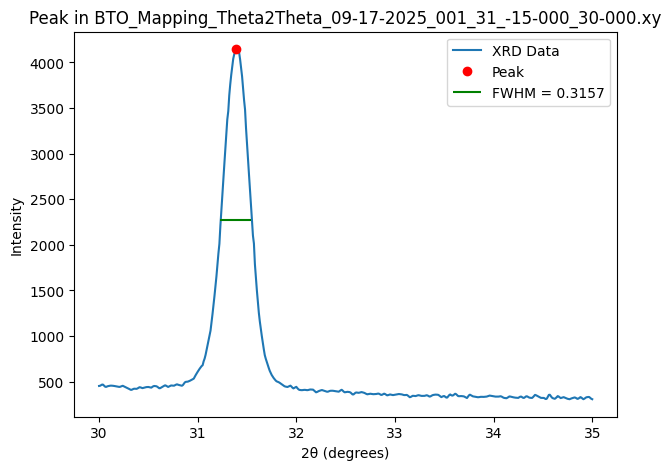

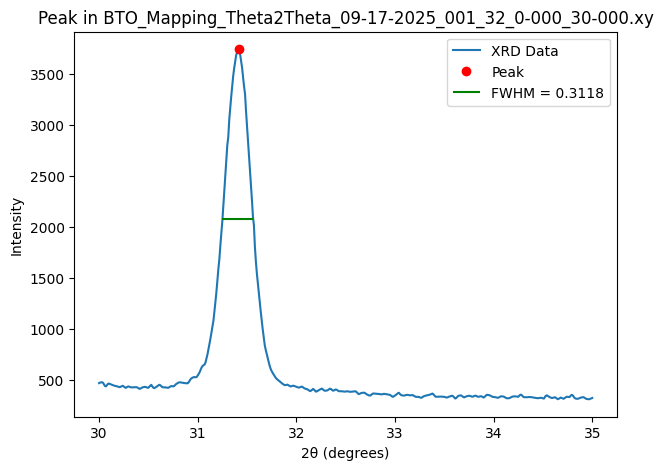

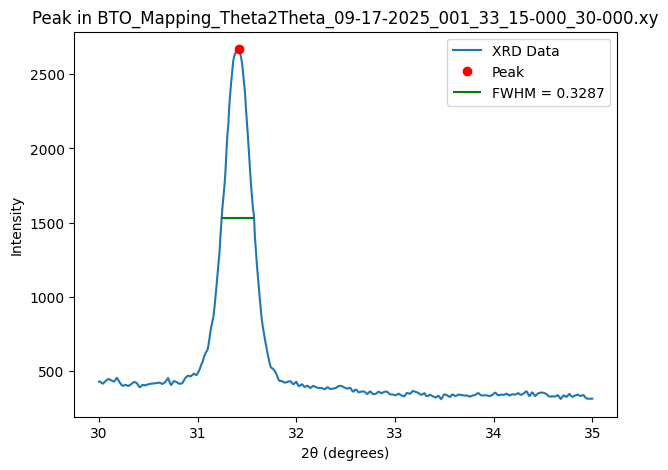

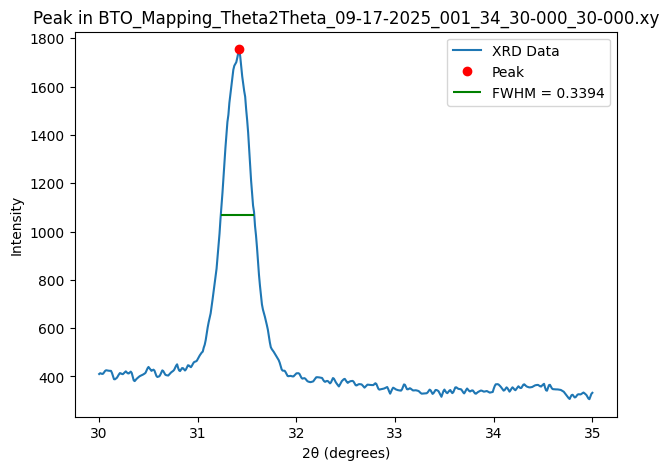

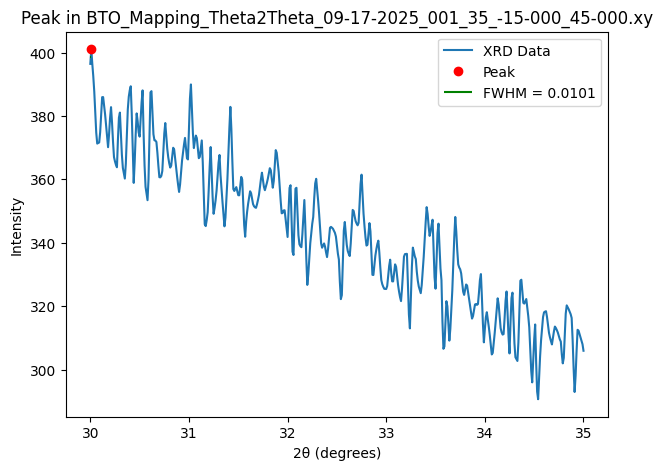

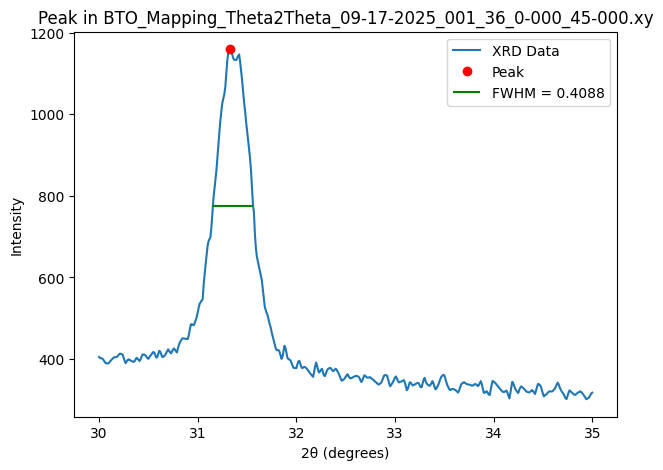

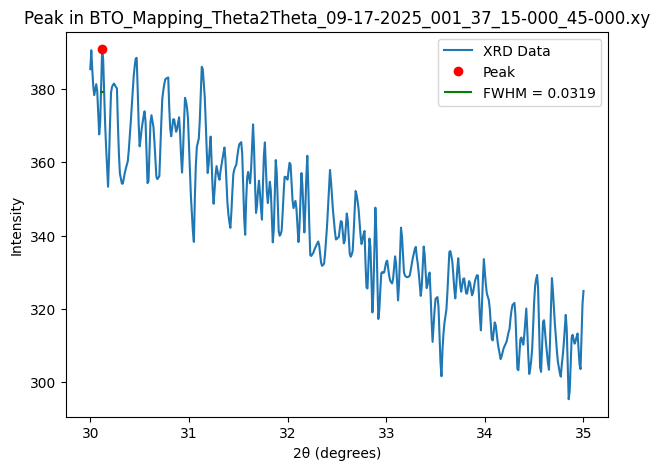

In [7]:
results = []

for f in files:
    # Read file
    df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])
    
    # Region of interest (30–35°)
    roi = df[(df["X"] >= 30) & (df["X"] <= 35)]
    x = roi["X"].values
    y = roi["Y"].values
    
    if len(x) == 0:
        continue  # skip if no data in ROI
    
    # Find peaks
    peaks, _ = find_peaks(y, prominence=0.1)  # adjust prominence if needed
    
    if len(peaks) > 0:
        # Take the most intense peak
        main_peak = peaks[np.argmax(y[peaks])]
        
        # Calculate FWHM
        widths, h_eval, left_ips, right_ips = peak_widths(y, [main_peak], rel_height=0.5)
        
        step_size = x[1] - x[0]  # assumes constant step
        fwhm = widths[0] * step_size
        peak_pos = x[main_peak]
        
        results.append((f, peak_pos, fwhm))
        
        # --- Plot (optional) ---
        plt.figure(figsize=(7,5))
        plt.plot(x, y, label="XRD Data")
        plt.plot(peak_pos, y[main_peak], "ro", label="Peak")
        plt.hlines(y=h_eval[0], xmin=x[int(left_ips[0])], xmax=x[int(right_ips[0])],
                   color="green", label=f"FWHM = {fwhm:.4f}")
        plt.xlabel("2θ (degrees)")
        plt.ylabel("Intensity")
        plt.title(f"Peak in {f}")
        plt.legend()
        # plt.show()

# Print summary
# for f, peak, fwhm in results:
#     print(f"{f} -> Peak at {peak:.3f}°, FWHM = {fwhm:.4f}°")

In [8]:
def token_to_float(tok: str) -> float:
    """Convert tokens like '20-000', '-15.500', or '-15-500' to float safely."""
    t = tok.strip()

    # already a normal decimal
    if '.' in t:
        return float(t)

    # handle dash used as decimal separator
    if '-' in t:
        if t.startswith('-'):
            # keep the sign; replace the FIRST remaining '-' with '.'
            body = t[1:].replace('-', '.', 1)
            t = '-' + body
        else:
            # positive number with dash as decimal
            t = t.replace('-', '.', 1)

    return float(t)

def parse_coords_from_name(path: str):
    """Take filename ..._Xcoord_Ycoord.xy (last two underscore tokens) and return floats."""
    name = os.path.splitext(os.path.basename(path))[0]
    x_str, y_str = name.split('_')[-2], name.split('_')[-1]
    return token_to_float(x_str), token_to_float(y_str)

In [9]:
files = glob.glob(os.path.join(folder, "*.xy"))

coords = [parse_coords_from_name(f) for f in files]           # [(x,y), ...]
X, Y = zip(*coords)     

fwhms = [row[2] for row in results]
x_coord = list(X)
y_coord = list(Y)
x_coord = x_coord[:37]
y_coord = y_coord[:37]
print(fwhms, type(fwhms[1]), type(X[1]), type(Y), len(fwhms), len(x_coord), len(y_coord))

[0.32876602544039024, 0.3115282824666923, 0.33717877244110084, 0.3101293809098492, 0.30992446671388224, 0.3127700469249537, 0.31101303017954923, 0.33445490787995724, 0.3950842128332625, 0.3173389738856423, 0.30585803433381803, 0.3090489781021864, 0.3175521633386426, 0.32979403445566713, 0.37784684849980343, 0.3026553957950421, 0.3180964987959629, 0.3036404675857122, 0.3079504533627229, 0.31534853172809574, 0.3274178039817035, 0.3710852446929239, 0.04109959294659891, 0.30526165315835524, 0.3124305621888697, 0.3121447165036003, 0.32209939913161695, 0.32376969946503653, 0.3651267183473984, 0.30730861296446904, 0.31572183767515316, 0.31178396978740197, 0.3286906658857974, 0.339432750829472, 0.010058063102543322, 0.4087526634235635, 0.031891754185340536] <class 'numpy.float64'> <class 'float'> <class 'tuple'> 37 37 37


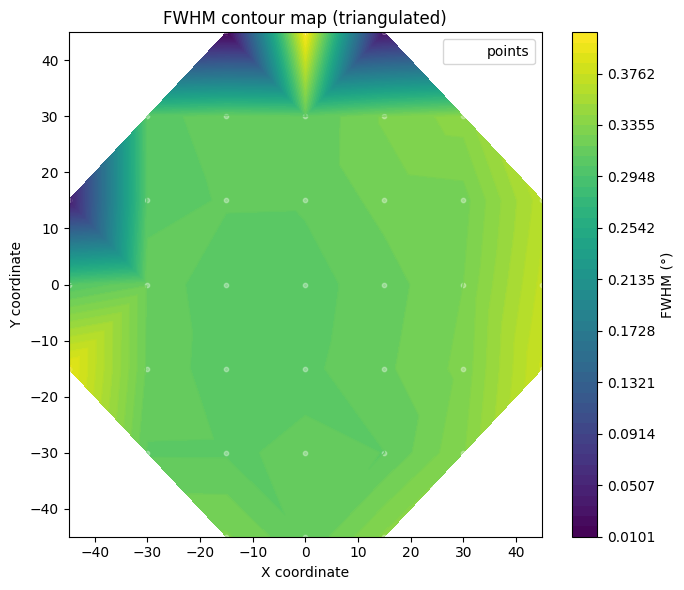

In [12]:
tri = Triangulation(x_coord, y_coord)
levels = np.linspace(np.nanmin(fwhms), np.nanmax(fwhms), 50)

plt.figure(figsize=(7,6))
cf = plt.tricontourf(tri, fwhms, levels=levels)                # filled contours (optional)
plt.tricontour(tri, fwhms, levels=levels, linewidths=0.8)      # contour LINES
plt.scatter(x_coord, y_coord, s=10, c='w', alpha=0.3, label='points')  # show data locations
plt.colorbar(cf, label="FWHM (°)")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("FWHM contour map (triangulated)")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
with open("BTO_fwhm_results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["X Coordinates", "Y Coordinates", "FWHM"])  # header
    for a, b, c in zip(x_coord, y_coord, fwhms):
        writer.writerow([a, b, c])